In [2]:
import sys
sys.path.append('../../../models/ZoeDepth/')

import torch
from zoedepth.models.builder import build_model
from zoedepth.utils.config import get_config
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import csv
import pandas as pd
from pprint import pprint
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import kendalltau

In [3]:

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
ARkit_scenes_path = "/mnt/IRONWOLF1/ashkan/data/ARKitScenes"

In [5]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)
if DEVICE == "cpu":
    print("WARNING: Running on CPU. This will be slow. Check your CUDA installation.")

pretrained_resource = 'local::/home/ashkanganj/workspace/ZoeDepth/checkpoints/midas-train-5epoch.pt'

overwrite = {"pretrained_resource": pretrained_resource}
conf = get_config("zoedepth", "infer",**overwrite)
print(conf['pretrained_resource'])

print("Config:")
pprint(conf)

model_learned = build_model(conf).to(DEVICE)
model_learned.eval()

cuda
local::/home/ashkanganj/workspace/ZoeDepth/checkpoints/midas-train-5epoch.pt
Config:
{'attractor_alpha': 1000,
 'attractor_gamma': 2,
 'attractor_kind': 'mean',
 'attractor_type': 'inv',
 'aug': False,
 'bin_centers_type': 'softplus',
 'bin_embedding_dim': 128,
 'clip_grad': 0.1,
 'dataset': 'ARkitScenes',
 'distributed': True,
 'force_keep_ar': True,
 'gpu': None,
 'img_size': [384, 512],
 'inverse_midas': False,
 'log_images_every': 0.1,
 'max_temp': 50.0,
 'max_translation': 100,
 'memory_efficient': True,
 'midas_model_type': 'DPT_BEiT_L_384',
 'min_temp': 0.0212,
 'model': 'zoedepth',
 'n_attractors': [16, 8, 4, 1],
 'n_bins': 64,
 'name': 'ZoeDepth',
 'notes': '',
 'output_distribution': 'logbinomial',
 'prefetch': False,
 'pretrained_resource': 'local::/home/ashkanganj/workspace/ZoeDepth/checkpoints/midas-train-5epoch.pt',
 'print_losses': False,
 'project': 'ZoeDepth',
 'random_crop': False,
 'random_translate': False,
 'root': '.',
 'save_dir': '/home/ashka/ZoeDepth/check

Using cache found in /home/ashkanganj/.cache/torch/hub/intel-isl_MiDaS_master
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1699449181202/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource local::/home/ashkanganj/workspace/ZoeDepth/checkpoints/midas-train-5epoch.pt
Loaded successfully


ZoeDepth(
  (core): MidasCore(
    (core): DPTDepthModel(
      (pretrained): Module(
        (model): Beit(
          (patch_embed): PatchEmbed(
            (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
            (norm): Identity()
          )
          (pos_drop): Dropout(p=0.0, inplace=False)
          (blocks): ModuleList(
            (0-23): 24 x Block(
              (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (attn): Attention(
                (qkv): Linear(in_features=1024, out_features=3072, bias=False)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=1024, out_features=1024, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=1024, out_features=4096, bias=Tru

In [6]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)
if DEVICE == "cpu":
    print("WARNING: Running on CPU. This will be slow. Check your CUDA installation.")

pretrained_resource_org = 'url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt    '

overwrite = {"pretrained_resource": pretrained_resource_org}
conf = get_config("zoedepth", "infer",**overwrite)
print(conf['pretrained_resource'])

print("Config:")
pprint(conf)

model_pretrained = build_model(conf).to(DEVICE)
model_pretrained.eval()

cuda
url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt    
Config:
{'attractor_alpha': 1000,
 'attractor_gamma': 2,
 'attractor_kind': 'mean',
 'attractor_type': 'inv',
 'aug': False,
 'bin_centers_type': 'softplus',
 'bin_embedding_dim': 128,
 'clip_grad': 0.1,
 'dataset': 'ARkitScenes',
 'distributed': True,
 'force_keep_ar': True,
 'gpu': None,
 'img_size': [384, 512],
 'inverse_midas': False,
 'log_images_every': 0.1,
 'max_temp': 50.0,
 'max_translation': 100,
 'memory_efficient': True,
 'midas_model_type': 'DPT_BEiT_L_384',
 'min_temp': 0.0212,
 'model': 'zoedepth',
 'n_attractors': [16, 8, 4, 1],
 'n_bins': 64,
 'name': 'ZoeDepth',
 'notes': '',
 'output_distribution': 'logbinomial',
 'prefetch': False,
 'pretrained_resource': 'url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt    ',
 'print_losses': False,
 'project': 'ZoeDepth',
 'random_crop': False,
 'random_translate': False,
 'root': '.',
 'save_dir': '/home/ashka/ZoeD

Using cache found in /home/ashkanganj/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt    
Loaded successfully


ZoeDepth(
  (core): MidasCore(
    (core): DPTDepthModel(
      (pretrained): Module(
        (model): Beit(
          (patch_embed): PatchEmbed(
            (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
            (norm): Identity()
          )
          (pos_drop): Dropout(p=0.0, inplace=False)
          (blocks): ModuleList(
            (0-23): 24 x Block(
              (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (attn): Attention(
                (qkv): Linear(in_features=1024, out_features=3072, bias=False)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=1024, out_features=1024, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=1024, out_features=4096, bias=Tru

# General Functions


In [7]:
def read_images(highre_path, lowres_path, image_path, downsampled_GT_depth):
    highres_depth = cv2.imread(highre_path, cv2.IMREAD_ANYDEPTH)
    lowres_depth = cv2.imread(lowres_path, cv2.IMREAD_ANYDEPTH)
    downsampled_GT_depth = cv2.imread(downsampled_GT_depth, cv2.IMREAD_ANYDEPTH)
    image = cv2.imread(image_path)

    return highres_depth, lowres_depth, image, downsampled_GT_depth


def rmse_valid_depths(predicted, gt):
    valid_mask = gt > 0

    # Calculate the squared difference between the two depth maps.
    sq_diff = (predicted - gt)**2

    # Calculate the mean squared difference for only valid depths.
    mse_valid = np.mean(sq_diff[valid_mask])

    # Calculate the RMSE for only valid depths.
    rmse_valid = np.sqrt(mse_valid)

    return rmse_valid


def absolute_relative_error(predicted, gt):
    valid_mask = gt > 0

    # Calculate the absolute difference between the two depth maps.
    abs_diff = np.abs(predicted - gt)

    # Calculate the absolute relative error.
    abs_rel_err = np.mean(abs_diff[valid_mask] / predicted[valid_mask])

    return abs_rel_err

def relative_error_loss(predicted, gt):
    # Create a mask for valid pixels where ground truth values are greater than zero.
    valid_mask = gt > 0

    # Calculate the absolute difference between the predicted and ground truth depth maps.
    abs_diff = np.abs(predicted[valid_mask] - gt[valid_mask])

    # Calculate the relative error loss using the valid mask.
    rel_loss = np.mean(abs_diff / gt[valid_mask])

    return rel_loss

def crop_image(image, crop_percentage):
    _, _, height, width = image.shape
    new_height = int((height * (100 - crop_percentage)) // 100)
    new_width = int((width * (100 - crop_percentage)) // 100)
    start_y = (height - new_height) // 2
    start_x = (width - new_width) // 2
    return image[:, :, start_y:start_y + new_height, start_x:start_x + new_width]


# An Example


In [8]:
subset = ['raw', 'upsampling']
# sample_id = '41069042'
sample_id = '42897501'
# sample_id = '42898826'
# frame_id = '41069042_3044.822'
frame_id = '42897501_270072.243'
# frame_id = '42898826_168121.460'

split = 'Validation'

In [9]:
# /mnt/IRONWOLF1/ashkan/data/ARKitScenes/upsampling/Validation/41069042/lowres_depth/41069042_3044.822.png
lowres_image_path = os.path.join(
    ARkit_scenes_path, subset[1], split, sample_id, 'lowres_wide', frame_id + '.png')

highres_image_path = os.path.join(
    ARkit_scenes_path, subset[1], split, sample_id, 'wide', frame_id + '.png')

highre_path = os.path.join(
    ARkit_scenes_path, subset[1], split, sample_id, 'highres_depth', frame_id + '.png')

lowres_path = os.path.join(
    ARkit_scenes_path, subset[1], split, sample_id, 'lowres_depth', frame_id + '.png')

downsampled_GT_depth_path = os.path.join(
    ARkit_scenes_path, subset[1], split, sample_id, 'downsampled_gt', frame_id + '.png')

highres_depth, lowres_depth, lowres_image, downsampled_GT_depth = read_images(
    highre_path, lowres_path, lowres_image_path, downsampled_GT_depth_path)

highres_image = cv2.imread(highres_image_path)

In [10]:
# convert depth to meters
highres_depth = highres_depth / 1000
lowres_depth = lowres_depth / 1000
downsampled_GT_depth = downsampled_GT_depth / 1000

In [11]:
import time
# learned model prediction
start_time = time.time()
learned_pred = model_learned.infer_pil(lowres_image)
Pre_trained = model_pretrained.infer_pil(lowres_image)

# Minimum and maximum values for the color map
vmin = 0.0
vmax = 6.5

# visualize depth_nk_high and depth_nk_low side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

img0 = ax[0].imshow(learned_pred, cmap='jet', vmin=vmin, vmax=vmax)
ax[0].set_title('zoe_N depth low res')
fig.colorbar(img0, ax=ax[0])

img1 = ax[1].imshow(Pre_trained, cmap='jet', vmin=vmin, vmax=vmax)
ax[1].set_title('Zoe Trained')
fig.colorbar(img1, ax=ax[1])
plt.show()

TypeError: expected size to be one of int or Tuple[int] or Tuple[int, int] or Tuple[int, int, int], but got size with types [<class 'numpy.int64'>, <class 'numpy.int64'>]

NameError: name 'lowres_image' is not defined

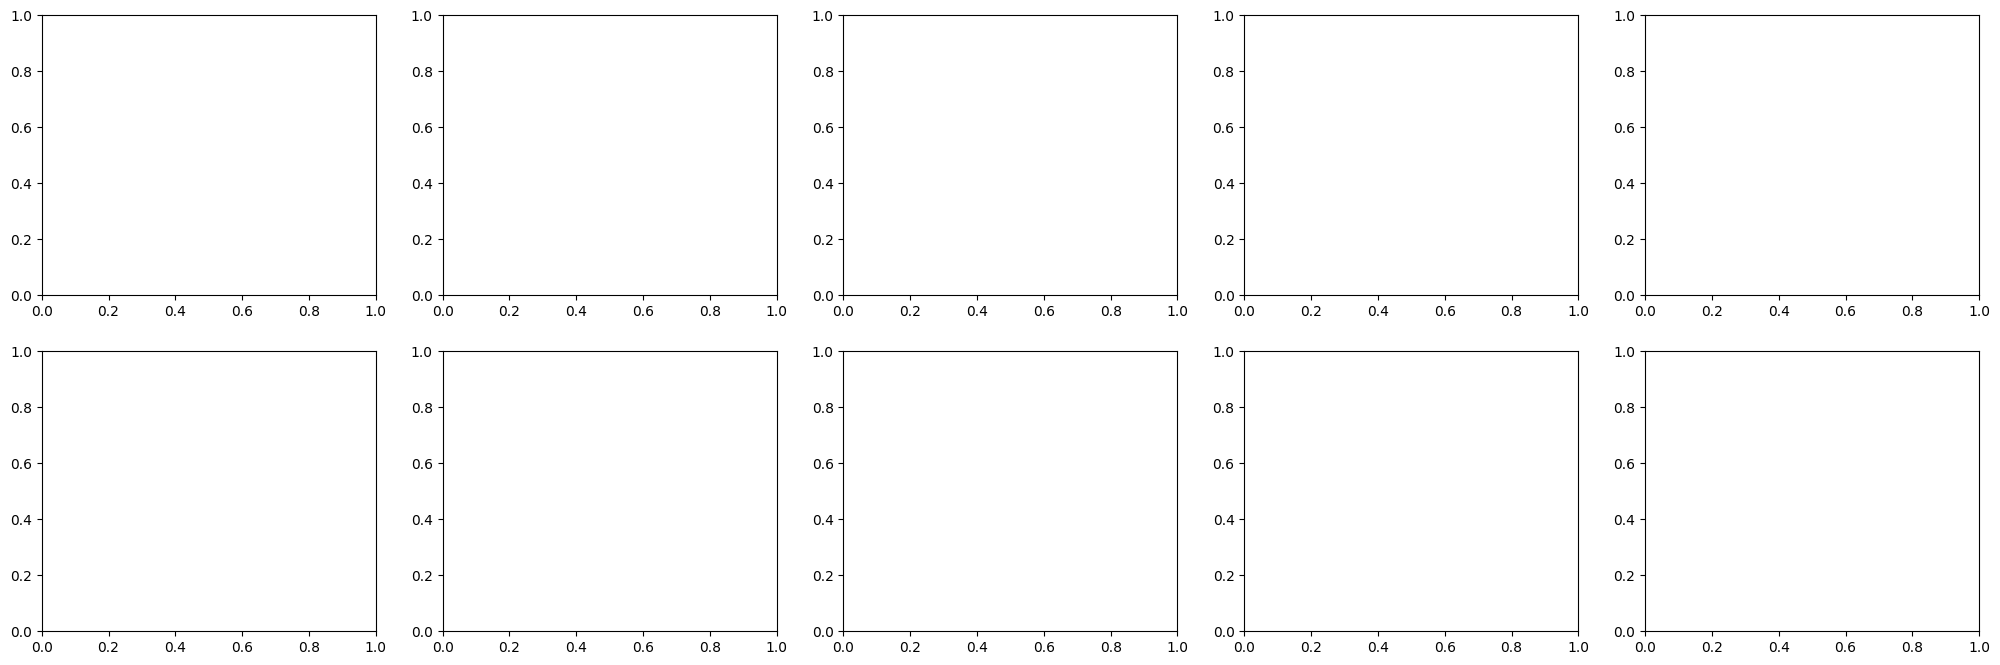

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(25, 8))


img0 = ax[0][0].imshow(lowres_image)
ax[0][0].set_title('Low-res Image')
# fig.colorbar(img0, ax=ax[0])

img1 = ax[0][1].imshow(lowres_depth, cmap='jet')
ax[0][1].set_title('ARKit Low-res depth')
fig.colorbar(img1, ax=ax[0][1])

img2 = ax[0][2].imshow(Pre_trained, cmap='jet')
ax[0][2].set_title('ZoeN Pre-trained')
fig.colorbar(img2, ax=ax[0][2])

img3 = ax[0][3].imshow(learned_pred, cmap='jet')
ax[0][3].set_title('Zoe Trained')
fig.colorbar(img3, ax=ax[0][3])

img4 = ax[0][4].imshow(downsampled_GT_depth, cmap='jet')
ax[0][4].set_title('Downsampled Ground Truth depth')
fig.colorbar(img4, ax=ax[0][4])

img0 = ax[1][0].imshow(lowres_image)
ax[1][0].set_title('Low-res Image')
# fig.colorbar(img0, ax=ax[0])

img1 = ax[1][1].imshow(lowres_depth, cmap='jet', vmin=vmin, vmax=vmax)
ax[1][1].set_title('ARKit Low-res depth')
fig.colorbar(img1, ax=ax[1][1])

img2 = ax[1][2].imshow(Pre_trained, cmap='jet', vmin=vmin, vmax=vmax)
ax[1][2].set_title('ZoeN Pre-trained')
fig.colorbar(img2, ax=ax[1][2])

img3 = ax[1][3].imshow(learned_pred, cmap='jet', vmin=vmin, vmax=vmax)
ax[1][3].set_title('Zoe Trained')
fig.colorbar(img3, ax=ax[1][3])

img4 = ax[1][4].imshow(downsampled_GT_depth, cmap='jet', vmin=vmin, vmax=vmax)
ax[1][4].set_title('Downsampled Ground Truth depth')
fig.colorbar(img4, ax=ax[1][4])

plt.show()


NameError: name 'lowres_image' is not defined

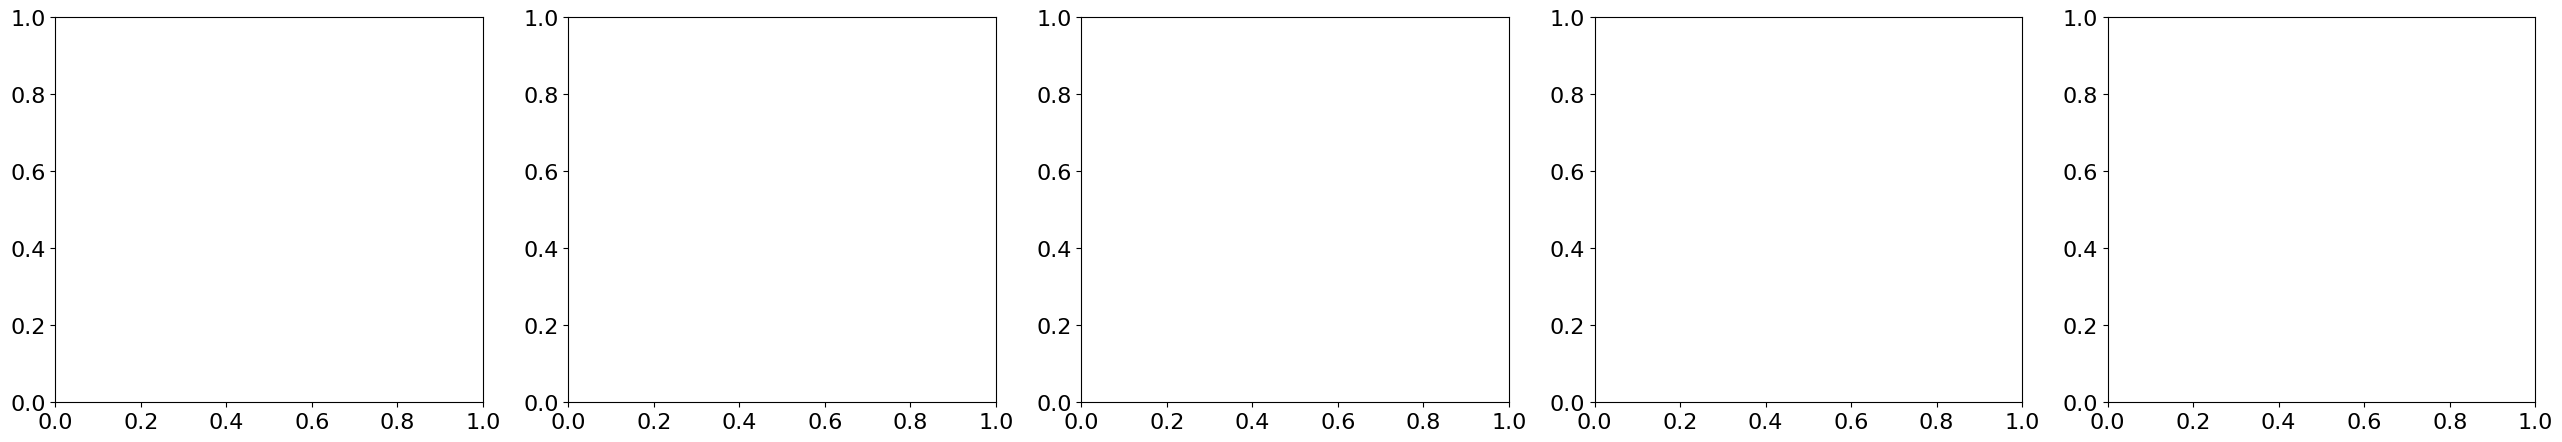

In [9]:
import matplotlib

# set font size
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, 5, figsize=(32, 5))

img0 = ax[0].imshow(lowres_image)
ax[0].set_title('Low-res Image')

img1 = ax[1].imshow(lowres_depth, cmap='jet')
ax[1].set_title('ARKit Low-res depth')
fig.colorbar(img1, ax=ax[1])

img2 = ax[2].imshow(Pre_trained, cmap='jet')
ax[2].set_title('ZoeN Pre-trained')
fig.colorbar(img2, ax=ax[2])

img3 = ax[3].imshow(learned_pred, cmap='jet')
ax[3].set_title('Zoe Trained')
fig.colorbar(img3, ax=ax[3])

img4 = ax[4].imshow(downsampled_GT_depth, cmap='jet')
ax[4].set_title('Downsampled Ground Truth depth')
fig.colorbar(img4, ax=ax[4])

plt.savefig('ArkitScenes_example.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
RMSE_nk_low = rmse_valid_depths(depth_n_low, downsampled_GT_depth)
RMSE_nk_high = rmse_valid_depths(depth_n_high, highres_depth)
RMSE_arkit = rmse_valid_depths(lowres_depth, downsampled_GT_depth)
RMSE_trained = rmse_valid_depths(learned_pred, downsampled_GT_depth)

REL_nk_low = absolute_relative_error(
    depth_n_low, downsampled_GT_depth)
REL_nk_high = absolute_relative_error(depth_n_high, highres_depth)
REL_arkit = absolute_relative_error(lowres_depth, downsampled_GT_depth)
REL_trained = absolute_relative_error(model_pretrained, downsampled_GT_depth)

# calculate kendall tao correlation
kendall_tau_arkit = kendalltau(
    lowres_depth.flatten(), downsampled_GT_depth.flatten()).statistic
kendall_tau_nk_low = kendalltau(
    depth_n_low.flatten(), downsampled_GT_depth.flatten()).statistic
kendall_tau_nk_high = kendalltau(
    depth_n_high.flatten(), highres_depth.flatten()).statistic
kendall_tau_trained = kendalltau(
    model_pretrained.flatten(), downsampled_GT_depth.flatten()).statistic

print('RMSE_nk_low: ', RMSE_nk_low)
print('RMSE_nk_high: ', RMSE_nk_high)
print('RMSE_arkit: ', RMSE_arkit)
print('RMSE_trained: ', RMSE_trained)

print('REL_nk_low: ', REL_nk_low)
print('REL_nk_high: ', REL_nk_high)
print('REL_arkit: ', REL_arkit)
print('REL_trained: ', REL_trained)

print('Kendall Tau ZoeDepth-N: ', kendall_tau_nk_low)
print('Kendall Tau LowRes Depth:', kendall_tau_arkit)
print('Kendall Tau learned depth:', kendall_tau_trained)

NameError: name 'depth_n_low' is not defined

# calculate error


In [12]:
subset = ['raw', 'upsampling']
split = 'Validation'
# write to csv
with open('/home/ashka/ZoeDepth/results/stats_results_midas_freeze.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["frame_id", "RMSE_n_low", "RMSE_n_high", "RMSE_Trained",
                    "RMSE_arkit", "REL_n_low", "REL_n_high", "REL_arkit", "REL_Trained", 
                    "Kendal_arkit", "Kendal_n_low", "Kenadal_n_high", "Kendal_Trained"])

for sample_id in os.listdir(os.path.join(ARkit_scenes_path,subset[1], split)):
    for frame_id in os.listdir(os.path.join(ARkit_scenes_path, subset[1], split, sample_id, 'highres_depth')):
        try: 
            lowres_image_path = os.path.join(
                ARkit_scenes_path, subset[1], split, sample_id, 'lowres_wide', frame_id)
            highres_image_path = os.path.join(
                ARkit_scenes_path, subset[1], split, sample_id, 'wide', frame_id)

            highre_path = os.path.join(
                ARkit_scenes_path, subset[1], split, sample_id, 'highres_depth', frame_id)

            lowres_path = os.path.join(
                ARkit_scenes_path, subset[1], split, sample_id, 'lowres_depth', frame_id)

            downsampled_GT_depth_path = os.path.join(
                ARkit_scenes_path, subset[1], split, sample_id, 'downsampled_gt', frame_id)

            highres_depth, lowres_depth, lowres_image, downsampled_GT_depth = read_images(
                highre_path, lowres_path, lowres_image_path, downsampled_GT_depth_path)

            highres_image = cv2.imread(highres_image_path)

            # convert depth to meters
            highres_depth = highres_depth / 1000
            lowres_depth = lowres_depth / 1000
            downsampled_GT_depth = downsampled_GT_depth / 1000

            # prediction zoe_n
            depth_nk_low = model_pretrained.infer_pil(lowres_image)
            depth_nk_high = model_pretrained.infer_pil(highres_image)
            # learned model prediction
            learned_pred = model_learned.infer_pil(lowres_image)
            # # calculate errors
            RMSE_nk_low = rmse_valid_depths(depth_nk_low, downsampled_GT_depth)
            RMSE_nk_high = rmse_valid_depths(depth_nk_high, highres_depth)
            RMSE_arkit = rmse_valid_depths(lowres_depth, downsampled_GT_depth)
            RMSE_trained = rmse_valid_depths(learned_pred, downsampled_GT_depth)

            REL_nk_low = relative_error_loss(
                depth_nk_low, downsampled_GT_depth)
            REL_nk_high = relative_error_loss(depth_nk_high, highres_depth)
            REL_arkit = relative_error_loss(lowres_depth, downsampled_GT_depth)
            REL_trained = relative_error_loss(learned_pred, downsampled_GT_depth)

            # calculate kendall tao correlation
            kendall_tau_arkit = kendalltau(
                lowres_depth.flatten(), downsampled_GT_depth.flatten()).statistic
            kendall_tau_nk_low = kendalltau(
                depth_nk_low.flatten(), downsampled_GT_depth.flatten()).statistic
            kendall_tau_nk_high = kendalltau(
                depth_nk_high.flatten(), highres_depth.flatten()).statistic
            kendall_tau_trained = kendalltau(
                learned_pred.flatten(), downsampled_GT_depth.flatten()).statistic
            
            # # write to csv
            with open('/home/ashka/ZoeDepth/results/stats_results_midas_freeze.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow([frame_id, RMSE_nk_low, RMSE_nk_high, RMSE_trained, RMSE_arkit,
                                REL_nk_low, REL_nk_high, REL_arkit, REL_trained,
                                kendall_tau_arkit, kendall_tau_nk_low, kendall_tau_nk_high, kendall_tau_trained])
        except Exception as e:
            print(f"Error occurred with sample_id: {sample_id}, frame_id: {frame_id}. Details: {str(e)}")
            continue

# Visualize the data


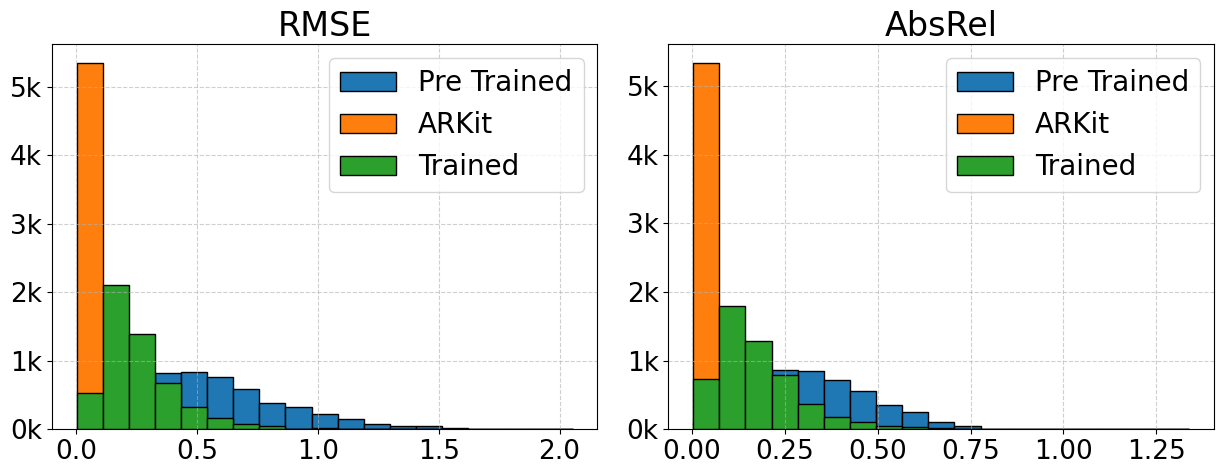

In [12]:
import matplotlib.ticker as ticker

# read csv
df = pd.read_csv('/home/ashkanganj/workspace/ZoeDepth/results/stats_results_midas_train.csv')
df.head()

# Define the formatter function
def k_formatter(x, pos):
    return f'{x/1000:.0f}k'


# Define common bin edges for all histograms
bin_edges_rmse = np.linspace(min(df['RMSE_n_low'].min(), df['RMSE_arkit'].min(), df['RMSE_Trained'].min()),
                             max(df['RMSE_n_low'].max(), df['RMSE_arkit'].max(), df['RMSE_Trained'].max()), 20)

bin_edges_rel = np.linspace(min(df['REL_n_low'].min(), df['REL_arkit'].min(), df['REL_Trained'].min()),
                            max(df['REL_n_low'].max(), df['REL_arkit'].max(), df['REL_Trained'].max()), 20)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Use common bin edges for all histograms
ax[0].hist(df['RMSE_n_low'], bins=bin_edges_rmse, edgecolor='black', label='Pre Trained')
ax[0].hist(df['RMSE_arkit'], bins=bin_edges_rmse, edgecolor='black', label='ARKit')
ax[0].hist(df['RMSE_Trained'], bins=bin_edges_rmse, edgecolor='black', label='Trained')
ax[0].set_title('RMSE', fontsize=24)
ax[0].legend(fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=19)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(k_formatter))
for spine in ax[0].spines.values():
    spine.set_visible(True)
# Use common bin edges for all histograms
ax[1].hist(df['REL_n_low'], bins=bin_edges_rel, edgecolor='black', label='Pre Trained')
ax[1].hist(df['REL_arkit'], bins=bin_edges_rel, edgecolor='black', label='ARKit')
ax[1].hist(df['REL_Trained'], bins=bin_edges_rel, edgecolor='black', label='Trained')
ax[1].set_title('AbsRel', fontsize=24)
ax[1].legend(fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=19)
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(k_formatter))
for spine in ax[1].spines.values():
    spine.set_visible(True)
# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.13)

plt.savefig('stats_midas_train_bins.pdf', dpi=300, bbox_inches='tight')
plt.show()


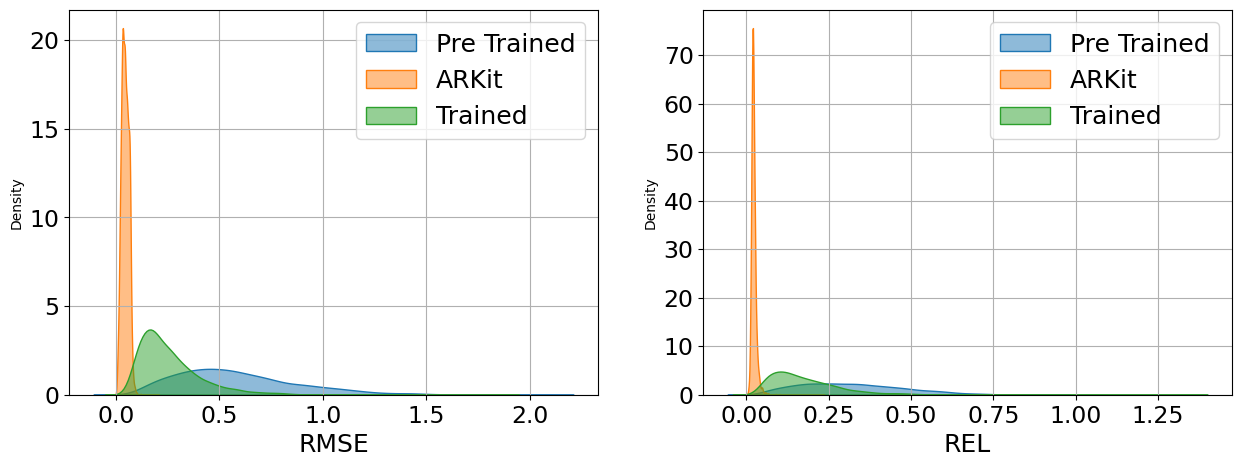

In [11]:

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# RMSE Plot
sns.kdeplot(df['RMSE_n_low'], ax=ax[0], fill=True, label='Pre Trained', alpha=0.5)
sns.kdeplot(df['RMSE_arkit'], ax=ax[0], fill=True, label='ARKit', alpha=0.5)
sns.kdeplot(df['RMSE_Trained'], ax=ax[0], fill=True, label='Trained', alpha=0.5)

ax[0].set_xlabel('RMSE', fontsize=18) # set x label
ax[0].legend(fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=17)
ax[0].grid(True)  # Add grid

# REL Plot
sns.kdeplot(df['REL_n_low'], ax=ax[1], fill=True, label='Pre Trained', alpha=0.5)
sns.kdeplot(df['REL_arkit'], ax=ax[1], fill=True, label='ARKit', alpha=0.5)
sns.kdeplot(df['REL_Trained'], ax=ax[1], fill=True, label='Trained', alpha=0.5)

ax[1].set_xlabel('REL', fontsize=18) # set x label
ax[1].legend(fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[1].grid(True)  # Add grid

plt.savefig('kde_stats_midas_train_filled_grid.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
df.describe()

,RMSE_n_low,RMSE_n_high,RMSE_Trained,RMSE_arkit,REL_n_low,REL_n_high,REL_arkit,REL_Trained,Kendal_arkit,Kendal_n_low,Kenadal_n_high,Kendal_Trained
count,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000,5594.000000
mean,0.584411,0.522496,0.367939,0.043220,0.318164,0.295220,0.021539,0.243657,0.719042,0.519435,0.555650,0.446859
std,0.295638,0.284455,0.200619,0.017431,0.156516,0.160701,0.008381,0.148958,0.197633,0.241240,0.233864,0.233094
min,0.048825,0.038218,0.050263,0.001974,0.026387,0.022778,0.003865,0.035359,-0.150949,-0.765870,-0.848471,-0.776701
25%,0.364412,0.306047,0.223461,0.029966,0.193991,0.164919,0.017008,0.133618,0.603195,0.377895,0.418527,0.303728
50%,0.536632,0.475183,0.319746,0.042194,0.303284,0.276788,0.020176,0.207980,0.762454,0.555941,0.592780,0.480695
75%,0.749646,0.686166,0.464891,0.056687,0.423687,0.404190,0.024264,0.316358,0.873595,0.697614,0.732095,0.619437
max,2.054421,1.979786,1.817770,0.199606,0.899639,0.976520,0.232377,1.653787,0.995045,0.968761,0.966349,0.950780


In [ ]:
# find 10 rows with highest RMSE_nk_high
df.sort_values(by=['Kendal_Trained'], ascending=True).head(20)

,frame_id,RMSE_n_low,RMSE_n_high,RMSE_Trained,RMSE_arkit,REL_n_low,REL_n_high,REL_arkit,REL_Trained,Kendal_arkit,Kendal_n_low,Kendal_n_high,Kendal_Trained
129,42898826_168121.460.png,0.484200,0.282983,2.190333,0.045941,0.349062,0.178659,0.021724,0.565259,0.884387,-0.460499,0.706827,-0.522535
265,42444946_223664.441.png,0.760091,0.467521,1.673533,0.057666,0.563711,0.292888,0.014399,0.443384,0.394826,-0.565057,0.047974,-0.500012
201,41069021_458.981.png,0.820980,0.731109,3.171084,0.047976,0.590009,0.581277,0.058336,0.853296,0.768369,-0.373213,0.680832,-0.469853
178,45662981_28025.148.png,1.118176,0.466077,1.512418,0.042013,0.799969,0.228197,0.014765,0.359864,0.861990,-0.537902,0.643916,-0.455773
349,48018732_1939.448.png,0.641830,0.286150,2.096950,0.063476,0.406684,0.132400,0.017173,0.528149,0.855122,-0.390179,0.788108,-0.450498
351,48018732_1984.530.png,0.613539,0.799396,2.627726,0.068078,0.373077,0.422879,0.026043,0.675451,0.847382,-0.343922,0.839477,-0.444466
400,44358446_43040.771.png,0.411238,0.528333,2.554545,0.040205,0.255757,0.290766,0.022134,0.672263,0.763948,-0.496664,0.671688,-0.444370
408,44358446_43124.137.png,0.620142,0.298359,2.862684,0.044252,0.392150,0.276021,0.028971,0.777692,0.354457,-0.365432,0.248912,-0.430821
133,42898826_168107.866.png,0.959012,0.596970,2.058547,0.079339,0.712397,0.377361,0.024688,0.484210,0.882110,-0.385960,0.854008,-0.425684
219,42446532_198860.505.png,0.651215,0.392042,2.255042,0.065350,0.427661,0.194165,0.023773,0.571686,0.790982,-0.390613,0.731864,-0.422849
